In [49]:
# Importing Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [22]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5))])
train_dataset = datasets.MNIST('dataset/', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True, num_workers=8)

test_dataset = datasets.MNIST('dataset/', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True, drop_last=True, num_workers=8)

In [19]:
dataiter = iter(train_loader)
data, targets = next(dataiter)

In [20]:
print(data.shape)
print(targets.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


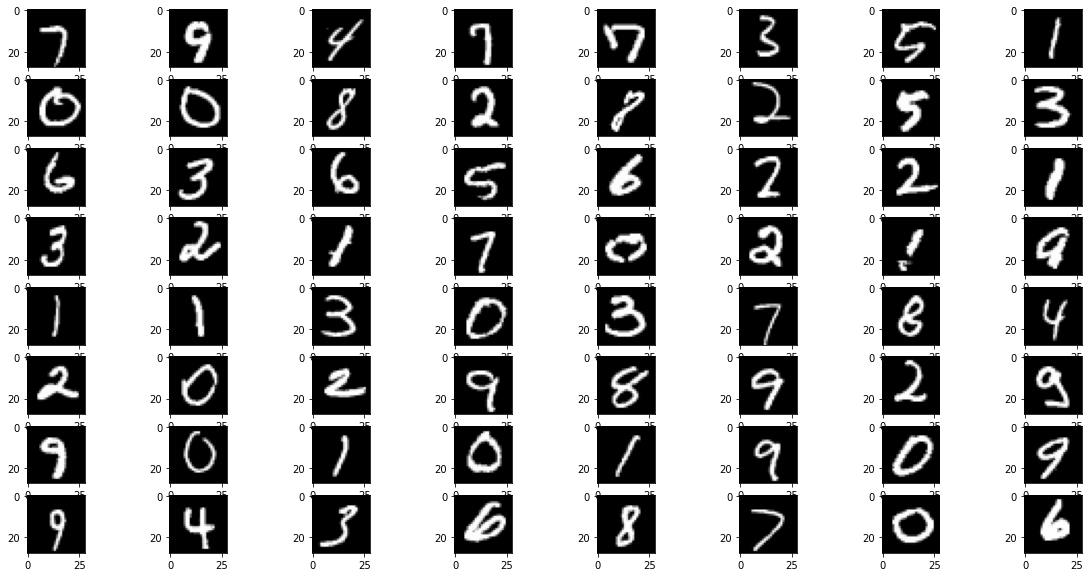

In [52]:
# Visualize MNIST DATA
def display(loader):
  data, targets = next(iter(train_loader))
  # shape of data: (batch_size, gray_channel, h, w)
  fig = plt.figure(figsize=(20,10))
  for i in range(data.shape[0]):
    img = data[i]
    img = img.squeeze(0)
    img = img.numpy()
    mean = np.array([0.5])
    std = np.array([0.5])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.subplot(8,8,i+1)
    plt.imshow(img, cmap='gray')
  plt.show()

display(train_loader)

In [59]:
class AENet(nn.Module):
  def __init__(self):
    super(AENet, self).__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 784)
    self.relu = nn.ReLU()
    
  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [60]:
model = AENet()
output = model(data.reshape(data.shape[0], -1))
print(output.shape)

torch.Size([64, 784])


In [76]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [62]:
def train(epochs=20):
  for epoch in range(epochs):
    running_loss = 0.0
    for idx, (data, _) in enumerate(train_loader):
      data = data.reshape(data.shape[0], -1)
      output = model(data)
      loss = criterion(output, data)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    print(f'Epoch: {epoch+1}/{epochs}\t Loss: {running_loss/len(train_loader)}')

In [74]:
# Visualizing one batch of test data
def test():
  with torch.no_grad():
    model.eval()
    data, _ = next(iter(test_loader))
    input_data = data.reshape(data.shape[0], -1)
    output = model(input_data)
    output = output.reshape(output.shape[0], 1, 28, 28)
    idx = 1
    plt.figure(figsize=(20,10))
    for i in range(output.shape[0]):
      i_img = data[i]
      i_img = i_img.squeeze(0)
      i_img = i_img.numpy()
      mean = np.array([0.5])
      std = np.array([0.5])
      i_img = std * i_img + mean
      i_img = np.clip(i_img, 0, 1)
      o_img = output[i]
      o_img = o_img.squeeze(0)
      o_img = o_img.numpy()
      mean = np.array([0.5])
      std = np.array([0.5])
      o_img = std * o_img + mean
      o_img = np.clip(o_img, 0, 1)
      plt.subplot(16,16,idx)
      plt.imshow(i_img,cmap='gray')
      idx+=1
      plt.subplot(16,16,idx)
      plt.imshow(o_img,cmap='gray')
      idx+=1
    plt.show()

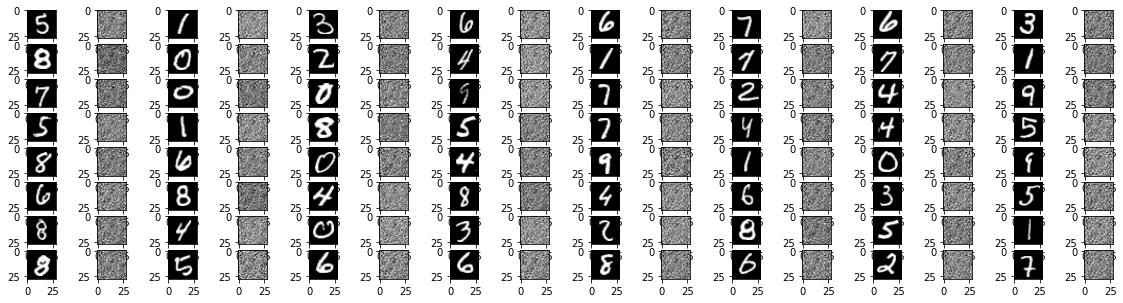

In [75]:
# Test before training
test()  
# As we see output generated is some noise

In [77]:
# Now we train the model
train()

Epoch: 1/20	 Loss: 0.1498354530814745
Epoch: 2/20	 Loss: 0.05210507356958303
Epoch: 3/20	 Loss: 0.03611069738570692
Epoch: 4/20	 Loss: 0.0283302591980426
Epoch: 5/20	 Loss: 0.02360490739957818
Epoch: 6/20	 Loss: 0.020459764121197713
Epoch: 7/20	 Loss: 0.018184556054267456
Epoch: 8/20	 Loss: 0.016391863301992736
Epoch: 9/20	 Loss: 0.0149303279049782
Epoch: 10/20	 Loss: 0.013779072989505918
Epoch: 11/20	 Loss: 0.012862483947960265
Epoch: 12/20	 Loss: 0.012129189397865387
Epoch: 13/20	 Loss: 0.011487986429285342
Epoch: 14/20	 Loss: 0.01095863683258552
Epoch: 15/20	 Loss: 0.010505264240298162
Epoch: 16/20	 Loss: 0.010121669167038471
Epoch: 17/20	 Loss: 0.009795117914068374
Epoch: 18/20	 Loss: 0.009515932955945123
Epoch: 19/20	 Loss: 0.009277063822960173
Epoch: 20/20	 Loss: 0.00907152096900926


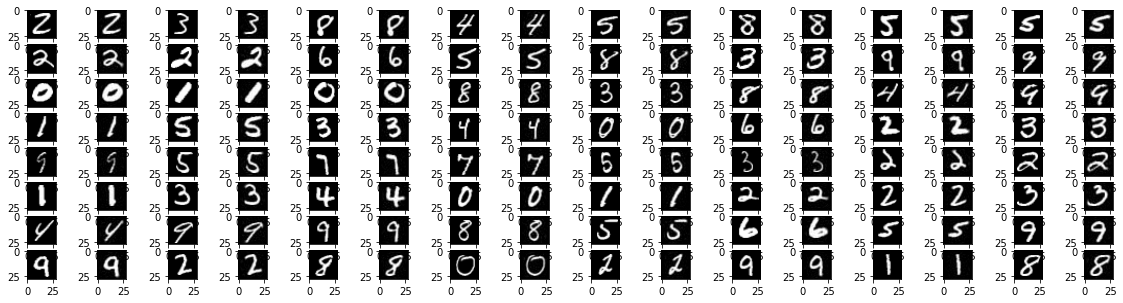

In [78]:
# Now we test the model
test()

In [ ]:
# Voila!!